# the application of a K-nearest neighbor for written numberal recognization

In [7]:
import numpy as np
import operator as op
import os
import matplotlib.pyplot as plt
import datetime
from PIL import Image

In [2]:
# 将图像数据转换为（1，1024）向量
def img2vector(filename):
    returnVect = np.zeros((1, 1024))
    file = open(filename)
    for i in range(32):
        lineStr = file.readline()
        for j in range(32):
            returnVect[0, 32 * i + j] = int(lineStr[j])
    return returnVect

# kNN分类器
def classifier(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key=op.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

# 测试手写数字识别代码
def handWritingClassTest(k):
    hwLabels = []
    trainingFileList = os.listdir('./knn-digits/trainingDigits')
    m = len(trainingFileList)
    trainingMat = np.zeros((m, 1024))
    batch_size = 100
    epoch = m // batch_size
    print("training...")
    for i in range(epoch):
        for j in range(i*batch_size, i*(batch_size)+batch_size):
            fileNameStr = trainingFileList[j]
            fileStr = fileNameStr.split('.')[0]
            classNumStr = int(fileStr.split('_')[0])
            hwLabels.append(classNumStr)
            trainingMat[j, :] = img2vector("./knn-digits/trainingDigits/%s" % fileNameStr)
            print("\rEpoch:{:d} Batch:{:d}".format(i+1,j+1), end='')
        print("\rEpoch:{:d}/{:d} Batch:{:d}".format(i+1, epoch,j+1), end='\n')
    testFileList = os.listdir('./knn-digits/testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    t_epoch = mTest // batch_size
    print("testing...")
    for i in range(t_epoch):
        for j in range(i*batch_size, i*(batch_size)+batch_size):
            fileNameStr = testFileList[j]
            fileStr = fileNameStr.split('.')[0]
            classNumStr = int(fileStr.split('_')[0])
            vectorTest = img2vector("./knn-digits/testDigits/%s" % fileNameStr)
            result = classifier(vectorTest, trainingMat, hwLabels, k)
            if result != classNumStr:
                errorCount += 1.0
            print("\rEpoch:{:d} Batch:{:d}".format(i+1,j+1), end='')
        print("\rEpoch:{:d}/{:d} Batch:{:d}".format(i+1, epoch,j+1), end='\n')
    print("k=%d" % k)
    accuracyRate = 1 - (errorCount / (t_epoch*batch_size))
    print("识别正确率：%f" % accuracyRate)
    return errorCount

# 测试取不同的k(1-4)值，识别的效果如何
def selectK():
    x = list()
    y = list()
    for i in range(1, 5):
        x.append(int(i))
        y.append(int(handWritingClassTest(i)))
    plt.xlabel("k")
    plt.ylabel("errorCount")
    plt.plot(x, y)
    plt.show()

training...
Epoch:1/19 Batch:100
Epoch:2/19 Batch:200
Epoch:3/19 Batch:300
Epoch:4/19 Batch:400
Epoch:5/19 Batch:500
Epoch:6/19 Batch:600
Epoch:7/19 Batch:700
Epoch:8/19 Batch:800
Epoch:9/19 Batch:900
Epoch:10/19 Batch:1000
Epoch:11/19 Batch:1100
Epoch:12/19 Batch:1200
Epoch:13/19 Batch:1300
Epoch:14/19 Batch:1400
Epoch:15/19 Batch:1500
Epoch:16/19 Batch:1600
Epoch:17/19 Batch:1700
Epoch:18/19 Batch:1800
Epoch:19/19 Batch:1900
testing...
Epoch:1/19 Batch:100
Epoch:2/19 Batch:200
Epoch:3/19 Batch:300
Epoch:4/19 Batch:400
Epoch:5/19 Batch:500
Epoch:6/19 Batch:600
Epoch:7/19 Batch:700
Epoch:8/19 Batch:800
Epoch:9/19 Batch:900
k=1
识别正确率：0.987778
training...
Epoch:1/19 Batch:100
Epoch:2/19 Batch:200
Epoch:3/19 Batch:300
Epoch:4/19 Batch:400
Epoch:5/19 Batch:500
Epoch:6/19 Batch:600
Epoch:7/19 Batch:700
Epoch:8/19 Batch:800
Epoch:9/19 Batch:900
Epoch:10/19 Batch:1000
Epoch:11/19 Batch:1100
Epoch:12/19 Batch:1200
Epoch:13/19 Batch:1300
Epoch:14/19 Batch:1400
Epoch:15/19 Batch:1500
Epoch:16/19

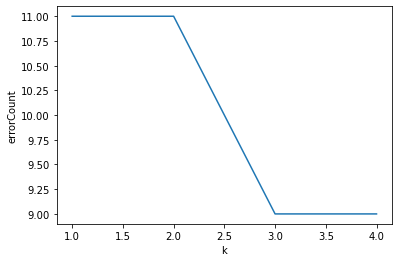

运行时间：75 s


In [3]:
# 测试，生成K折线图
starttime = datetime.datetime.now()
selectK()
endtime = datetime.datetime.now()
print("运行时间：%d s" % (endtime - starttime).seconds)

In [4]:
# 测试证明，k选3效果比较好，选k=3进行手写数字识别
handWritingClassTest(3)

training...
Epoch:1/19 Batch:100
Epoch:2/19 Batch:200
Epoch:3/19 Batch:300
Epoch:4/19 Batch:400
Epoch:5/19 Batch:500
Epoch:6/19 Batch:600
Epoch:7/19 Batch:700
Epoch:8/19 Batch:800
Epoch:9/19 Batch:900
Epoch:10/19 Batch:1000
Epoch:11/19 Batch:1100
Epoch:12/19 Batch:1200
Epoch:13/19 Batch:1300
Epoch:14/19 Batch:1400
Epoch:15/19 Batch:1500
Epoch:16/19 Batch:1600
Epoch:17/19 Batch:1700
Epoch:18/19 Batch:1800
Epoch:19/19 Batch:1900
testing...
Epoch:1/19 Batch:100
Epoch:2/19 Batch:200
Epoch:3/19 Batch:300
Epoch:4/19 Batch:400
Epoch:5/19 Batch:500
Epoch:6/19 Batch:600
Epoch:7/19 Batch:700
Epoch:8/19 Batch:800
Epoch:9/19 Batch:900
k=3
识别正确率：0.990000


9.0

In [8]:
# 将txt文件转换为png图片
def file2img(filename, target):
    fr = open(filename)
    name = filename.split('/')[-1][:-4]
    print(name)
    image = Image.new("L", (32, 32))
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            colorValue = int(lineStr[j])
            if colorValue == 1:
                colorValue = 255
            image.putpixel((j, i), int(colorValue))
            image.save(target + "/" + name + ".png")

# 生成图片
def genImg(filename, target):
    fileList = os.listdir(filename)
    m = len(fileList)
    if not os.path.exists(target):
        os.mkdir(target)
    for i in range(m):
        file2img(filename + fileList[i], target)

# genImg("./knn-digits/trainingDigits/", "training_img")
# genImg("./knn-digits/testDigits/", "test_img")

In [9]:
"""
将图像数据转换为txt文件
:param img_path: 图像文件路径
:type txt_name: 输出txt文件路径
"""
def img2txt(img_path, txt_name):
    im = Image.open(img_path).convert('1').resize((32, 32))  # type:Image.Image
    data = np.asarray(im)
    np.savetxt(txt_name, data, fmt='%d', delimiter='')